## Regression-Model für Autos
Wir wollen eine Vorhersage treffen können, wie teuer ein Elektro-Auto aufgrund des PS-Standes

## Imports

In [307]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import scipy.stats as stats

c:\Users\luchu\Documents\GitHub\DA_LN_neues_Github\Analysen


## CSV Dateien Einlesen

In [308]:
autos_orig = pd.read_csv('../Ausgabedateien/autos_aufbereitet.csv')
autos_orig["Preis"] = autos_orig["Preis"].str.replace("'", "").str.strip()
autos_na =autos_orig.dropna(subset=['Preis', 'ps-stand', 'jahr'])
autos_na

,Unnamed: 0,web-scraper-order,web-scraper-start-url,Preis,plz,jahr,ps-stand,Farbe,PLZ4,%_IN_GDE,KTKZ,GDENR,GDENAMK,Hist.-Nummer,Kanton,Bezirks-nummer,Bezirksname,BFS Gde-nummer,Gemeindename,Datum der Aufnahme
1,1,1669622809-190,https://www.autolina.ch/elektro-auto,42500,6464,2022.0,204.0,weiss,6464.0,0.36,UR,1205.0,Bürglen (UR),11506.0,UR,400.0,Kt. Uri,1205,Bürglen (UR),1848-09-12
3,3,1669622809-192,https://www.autolina.ch/elektro-auto,44900,1184,2019.0,513.0,weiss,1184.0,100.00,VD,5858.0,Luins,14638.0,VD,2228.0,Nyon,5858,Luins,2006-09-01
9,9,1669622809-198,https://www.autolina.ch/elektro-auto,26450,6440,2020.0,145.0,grau,6440.0,99.54,SZ,1364.0,Ingenbohl,12657.0,SZ,506.0,Schwyz,1364,Ingenbohl,1848-09-12
10,10,1669622809-199,https://www.autolina.ch/elektro-auto,43899,8580,2017.0,525.0,blau,8580.0,0.51,SG,3202.0,Muolen,14379.0,SG,1721.0,St. Gallen,3202,Muolen,2003-01-01
11,11,1669622809-200,https://www.autolina.ch/elektro-auto,96699,8580,2021.0,573.0,weiss,8580.0,0.51,SG,3202.0,Muolen,14379.0,SG,1721.0,St. Gallen,3202,Muolen,2003-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,2307,1669622809-2496,https://www.autolina.ch/elektro-auto,79900,1163,2022.0,299.0,weiss,1163.0,100.00,VD,5636.0,Etoy,14703.0,VD,2227.0,Morges,5636,Etoy,2006-09-01
2207,2308,1669622809-2497,https://www.autolina.ch/elektro-auto,36890,1219,2021.0,136.0,weiss,1219.0,51.74,GE,6643.0,Vernier,10918.0,GE,2500.0,Cant. de Genève,6643,Vernier,1848-09-12
2208,2309,1669622809-2498,https://www.autolina.ch/elektro-auto,112790,4310,2022.0,503.0,schwarz,4310.0,98.50,AG,4258.0,Rheinfelden,12911.0,AG,1909.0,Rheinfelden,4258,Rheinfelden,1848-09-12
2210,2311,1669622809-2500,https://www.autolina.ch/elektro-auto,49800,3322,2022.0,218.0,blau,3322.0,100.00,BE,543.0,Mattstetten,15122.0,BE,246.0,Bern-Mittelland,543,Mattstetten,2010-01-01


## Train / Test Sample erstellen. 
Es muss ein Train / Test Sample erstellt werden. Das Modell soll den Preis voraussagen können in Abhängigkeit zur Variable PS-Stand

In [309]:
"""x = autos_na['ps-stand']
y = autos_na['Preis']
x = x.values.reshape(1,-1)
y = y.values.reshape(1, -1)
#x.ndim, x.shape
y.ndim, y.shape"""

"x = autos_na['ps-stand']\ny = autos_na['Preis']\nx = x.values.reshape(1,-1)\ny = y.values.reshape(1, -1)\n#x.ndim, x.shape\ny.ndim, y.shape"

In [310]:
x = autos_na['ps-stand'].astype(float)
y = autos_na['Preis'].astype(float)


X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=42)

print("Anzahl Werte für das Training", (len(X_train)))
print("Anzahl Werte für den Test", (len(X_test)))



#print(y_train.head())




Anzahl Werte für das Training 673
Anzahl Werte für den Test 289


In [311]:
# Fit the regression model
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            23856.69
Slope of regression line (beta):          124.519
p-value:                                  0.0000
R-squared (coefficient of determination): 0.4596


In [312]:
# Mit dieser methode können alle relevatnen Werte in einem Arry (lin_out) gespeichert werden
lin_out = stats.linregress(X_train, y_train)

# Die Einzelnen Objekte können anschliessend einfach angesteuert werden mit lin_out[x]
print(lin_out)


LinregressResult(slope=124.51896894224704, intercept=23856.68766730349, rvalue=0.6779291866832006, pvalue=9.67640664347888e-92, stderr=5.212576277212048, intercept_stderr=1512.3299933869505)


## Graphisches Herleitung des Modells

Text(0.5, 0, 'PS-Stand')

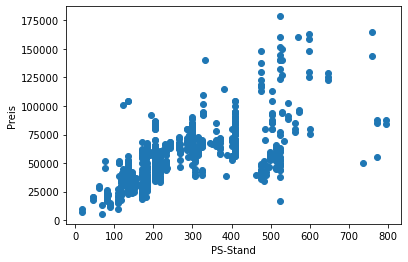

In [313]:
plt.scatter(x,y)
plt.ylabel("Preis")
plt.xlabel("PS-Stand")

In [314]:
def model(x):
    return lin_out[0] * x + lin_out[1]

Text(0.5, 0, 'PS-Stand')

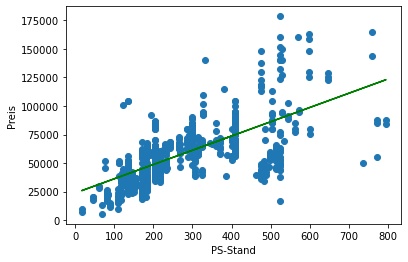

In [315]:
mymodel = pd.Series(map(model, X_train))

plt.scatter(x,y)
plt.plot(X_train, mymodel, color='green')
plt.ylabel("Preis")
plt.xlabel("PS-Stand")

In [316]:
X_test

789     184.0
861     327.0
805     286.0
1790    122.0
657     204.0
        ...  
1834    408.0
1291    408.0
1117    231.0
2100    408.0
948     204.0
Name: ps-stand, Length: 289, dtype: float64

In [317]:
print("Ergebnis Regressionsmodell:",model(184), "\nTatsächliches Ergebnis (Testdatei):", y_test[789])

Ergebnis Regressionsmodell: 46768.177952676946 
Tatsächliches Ergebnis (Testdatei): 31900.0


In [331]:
s = X_test.iloc[0]
model(s)

46768.177952676946

In [349]:
i = 0
residuals = []
while i <= 200:
   test = X_test.iloc[i]
   print("Geschätzer pries:", model(test), ", Tatsächlicher Preis", y_test.iloc[i])
   calculation = model(test)-y_test.iloc[i]
   residuals.append(calculation)
   i = i + 1

Geschätzer pries: 46768.177952676946 , Tatsächlicher Preis 31900.0
Geschätzer pries: 64574.39051141827 , Tatsächlicher Preis 94950.0
Geschätzer pries: 59469.11278478615 , Tatsächlicher Preis 68900.0
Geschätzer pries: 39048.00187825763 , Tatsächlicher Preis 44527.0
Geschätzer pries: 49258.557331521886 , Tatsächlicher Preis 61900.0
Geschätzer pries: 93836.34821284632 , Tatsächlicher Preis 79900.0
Geschätzer pries: 40791.26744344909 , Tatsächlicher Preis 43200.0
Geschätzer pries: 61087.85938103535 , Tatsächlicher Preis 76640.0
Geschätzer pries: 49258.557331521886 , Tatsächlicher Preis 39999.0
Geschätzer pries: 49258.557331521886 , Tatsächlicher Preis 69800.0
Geschätzer pries: 61087.85938103535 , Tatsächlicher Preis 61800.0
Geschätzer pries: 64574.39051141827 , Tatsächlicher Preis 101400.0
Geschätzer pries: 46270.10207690796 , Tatsächlicher Preis 49990.0
Geschätzer pries: 61087.85938103535 , Tatsächlicher Preis 79900.0
Geschätzer pries: 87734.91873467622 , Tatsächlicher Preis 55900.0
Gesch

In [350]:
residuals

[14868.177952676946,
 -30375.60948858173,
 -9430.88721521385,
 -5478.99812174237,
 -12641.442668478114,
 13936.348212846322,
 -2408.732556550909,
 -15552.140618964651,
 9259.557331521886,
 -20541.442668478114,
 -712.1406189646514,
 -36825.60948858173,
 -3719.8979230920377,
 -18812.14061896465,
 31834.91873467622,
 -5337.621650022396,
 21924.35693422123,
 2278.557331521886,
 -10812.140618964651,
 2808.557331521886,
 2551.8228967133473,
 11291.267443449091,
 -6645.785563001045,
 3019.926002488639,
 5358.557331521886,
 15034.533008640545,
 -39772.283116186925,
 10782.426995740287,
 -10641.442668478114,
 3458.557331521886,
 9360.041269704605,
 -641.4426684781138,
 -2664.6474264662247,
 30967.13420054251,
 -34241.442668478114,
 1201.8228967133473,
 41327.716883813075,
 3458.557331521886,
 -5045.785563001045,
 2059.49216363109,
 3920.5694929625606,
 -711.4426684781138,
 -14875.087612514515,
 1088.8593810353486,
 766.7484745068359,
 17775.275244202305,
 13848.963940373134,
 2278.557331521886,

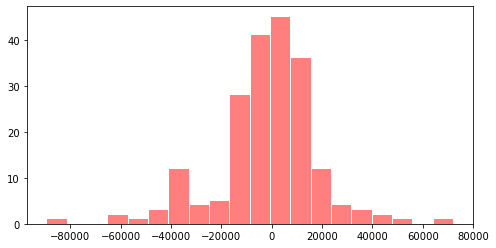

In [352]:
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='red',
                            alpha=0.5,
                            rwidth=0.95
                   )